# Mag TOV (7 levels, dynamical spacetime)

In [1]:
using Plots, Printf, Measures
using LaTeXStrings
include("../../Utils/misc-stdout.jl")

Main.MiscStdout

## Scaling-noSC

Zcs/sec
  magTOV-Z4c-7Levels: [ 3.66e+07,      NaN, 1.17e+08, 2.17e+08, 3.90e+08, 7.73e+08, 1.55e+09]


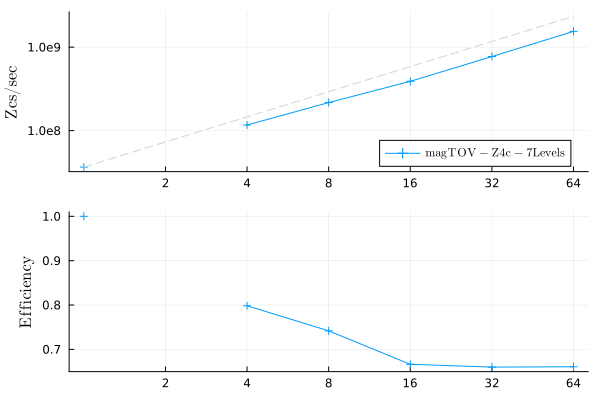

In [2]:
let patt_dirss = [
        ([
            (r"magTOV_Z4c_L7_N\d+_r0000", "magTOV-Z4c-7Levels"),
        ], "../data/magTOV-Scaling/Levels7/Block8-noSC/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e8, 1e9]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1], efficiency, label="", marker = mark)
        end
    end

    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

## Scaling Z4cowGPU

Zcs/sec
  magTOV-Z4cowGPU-7Levels: [ 1.73e+08, 3.10e+08, 5.94e+08, 1.11e+09, 2.15e+09, 4.22e+09, 7.92e+09, 1.47e+10, 2.55e+10, 4.73e+10, 5.95e+10, 7.76e+10]


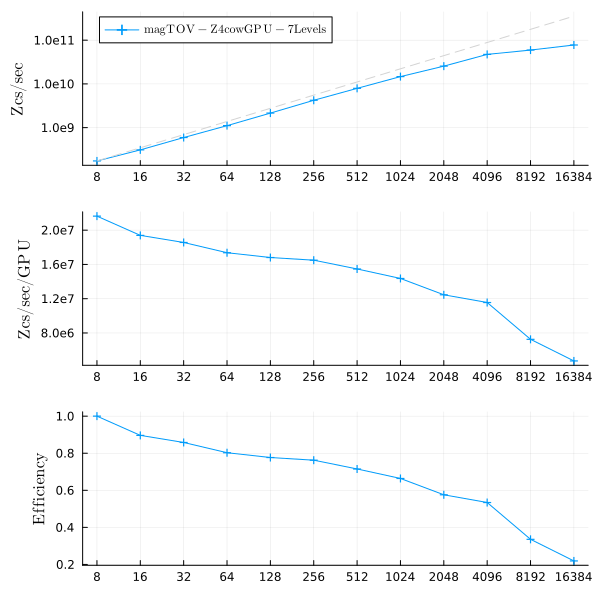

In [3]:
let patt_dirss = [
        ([
            (r"magTOV_Z4cowGPU_L7_N\d+_r0000", "magTOV-Z4cowGPU-7Levels"),
        ], "../data/magTOV-Scaling/Levels7/Block8-Z4cowGPU/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e9, 1e10, 1e11]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])

    plt3 = plot(ylabel=L"\mathrm{Zcs/sec/GPU}", xscale=:log10)
    xticks!(plt3, xs, [string(n) for n in xs])
    ys = [8e6, 1.2e7, 1.6e7, 2e7]
    yticks!(plt3, ys, [string(n) for n in ys])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1] * 8, dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1] * 8, dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            plot!(plt3, dat[1] * 8, dat[2] ./ (dat[1] * 8), label = "",  marker = mark)
            
            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1] * 8, efficiency, label="", marker = mark)
        end
    end

    plt = plot(plt1, plt3, plt2, layout=(3,1), size=(600, 600))
    display(plt)
end

## Scaling

Zcs/sec
] magTOV-Z4c-7Levels: [ 2.66e+08, 4.93e+08, 9.25e+08, 1.71e+09, 3.44e+09, 5.95e+09, 1.00e+10, 1.55e+10


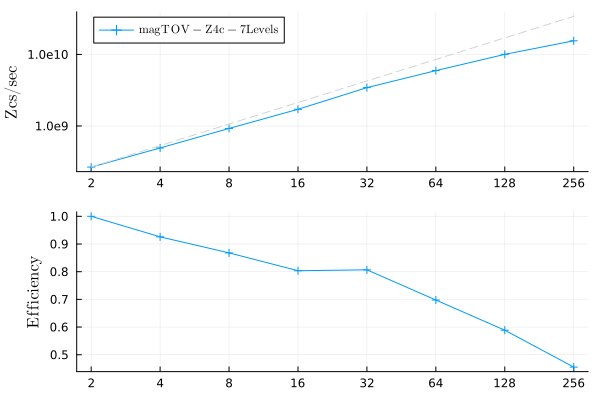

In [4]:
let patt_dirss = [
        ([
            (r"magTOV_Z4c_L7_N\d+_r0000", "magTOV-Z4c-7Levels"),
        ], "../data/magTOV-Scaling/Levels7/Block8/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e9, 1e10]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1] / 2, label="", linestyle=:dash, color=:lightgray)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1], efficiency, label="", marker = mark)
        end
    end

    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

## Speed

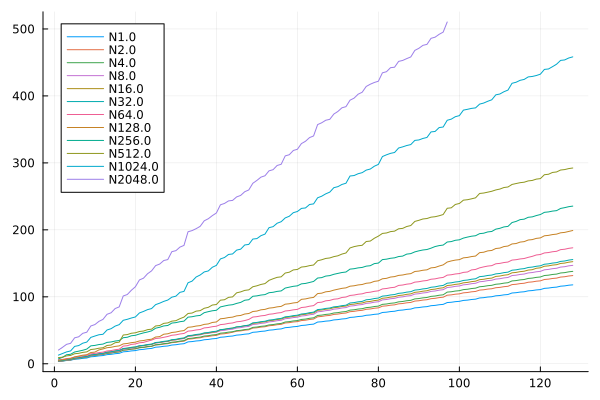

In [5]:
let patt_dirss = [
        ([
            (r"magTOV_Z4cowGPU_L7_N\d+_r0000", ""),
        ], "../data/magTOV-Scaling/Levels7/Block8-Z4cowGPU/", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,1))
    display(plt)
end